In [1]:
import pandas as pd
from pandas_datareader import data as web # Package and modules for importing data.S
import datetime

import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

#stock prices over the past year, starting at January 1, 2017
start = datetime.datetime(2017,1,1)
end = datetime.date.today()

Populating the interactive namespace from numpy and matplotlib


2y
2y
2y
2y
2y
                AAPL      AMZN      BABA        FB      GOOG
date                                                        
2017-01-03  1.000000  1.000000  1.000000  1.000000  1.000000
2017-01-04  0.998881  1.004657  1.021558  1.015660  1.000967
2017-01-05  1.003960  1.035533  1.065124  1.032603  1.010024
2017-01-06  1.015153  1.056152  1.059707  1.056050  1.025453
2017-01-09  1.024451  1.057386  1.069074  1.068800  1.026090


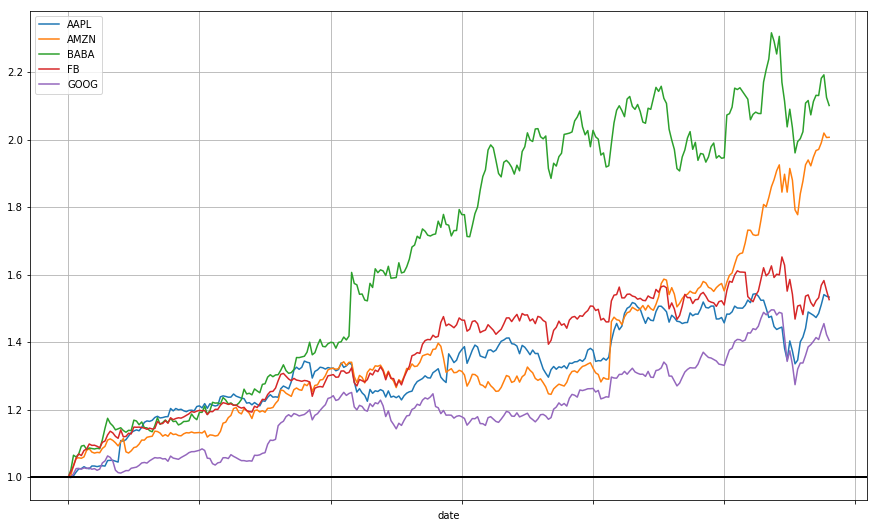

In [2]:
# GAFAA
google = web.DataReader('GOOG', 'iex', start, end)
apple = web.DataReader('AAPL', 'iex', start, end)
facebook = web.DataReader('FB', 'iex', start, end)
amazon = web.DataReader('AMZN', 'iex', start, end)
alibaba = web.DataReader('BABA', 'iex', start, end)

gafaa_stocks = pd.DataFrame({"GOOG": google["close"],
                       "AAPL": apple["close"],
                       "FB": facebook["close"],
                       "AMZN": amazon["close"],
                       "BABA": alibaba["close"]})

gafaa_stock_return = gafaa_stocks.apply(lambda x: x / x[0])
print(gafaa_stock_return.head())

gafaa_stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

2y
2y
2y
2y
                CRSP      EDIT      NTLA      SGMO
date                                              
2017-01-03  1.000000  1.000000  1.000000  1.000000
2017-01-04  1.046667  1.085681  1.039318  1.129032
2017-01-05  1.020444  1.028756  1.025964  1.112903
2017-01-06  1.001778  1.027582  1.029674  1.177419
2017-01-09  1.017333  1.079225  1.060831  1.193548


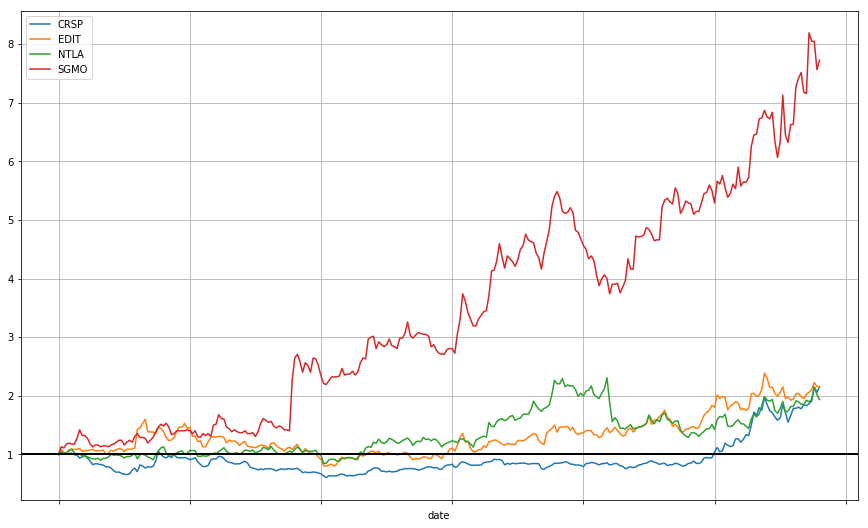

In [3]:
# GENE
editas = web.DataReader('EDIT', 'iex', start, end)
intellia = web.DataReader('NTLA', 'iex', start, end)
crispr = web.DataReader('CRSP', 'iex', start, end)
sangamo = web.DataReader('SGMO', 'iex', start, end)

gene_stocks = pd.DataFrame({"EDIT": editas["close"],
                       "NTLA": intellia["close"],
                       "CRSP": crispr["close"],
                       "SGMO": sangamo["close"]})

gene_stock_return = gene_stocks.apply(lambda x: x / x[0])
print(gene_stock_return.head())
gene_stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

2y
2y
2y
2y
2y
2y
2y
2y
                BABA      BADU       CEO       CHL        JD       LFC  \
date                                                                     
2017-01-03  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2017-01-04  1.021558  1.021747  1.012900  1.010214  1.001162  1.002257   
2017-01-05  1.065124  1.054486  1.027234  1.038585  1.018590  1.033108   
2017-01-06  1.059707  1.048010  1.017439  1.022886  1.017428  1.012792   
2017-01-09  1.069074  1.052644  1.000319  1.024210  1.017041  1.008277   

                 PTR       SNP  
date                            
2017-01-03  1.000000  1.000000  
2017-01-04  1.000401  0.998196  
2017-01-05  1.040268  1.030951  
2017-01-06  1.041070  1.036086  
2017-01-09  1.052575  1.038168  


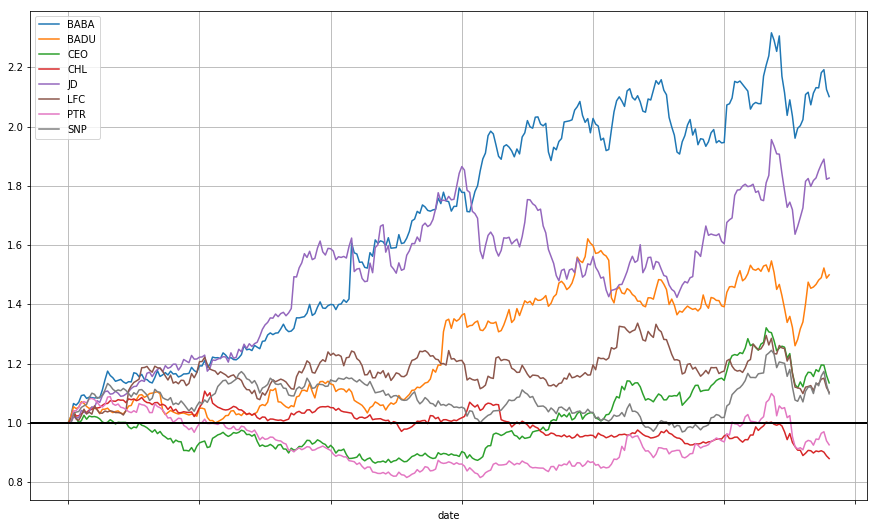

In [4]:
# Chinese
baidu = web.DataReader('BIDU', 'iex', start, end)        # 百度
jingdong = web.DataReader('JD', 'iex', start, end)       # 京东
chinalife = web.DataReader('LFC', 'iex', start, end)     # 中人寿
chinamobile = web.DataReader('CHL', 'iex', start, end)   # 中移动
petrochina = web.DataReader('PTR', 'iex', start, end)    # 中石油
chinapetroleum = web.DataReader('SNP', 'iex', start, end)# 中石化
cnooc = web.DataReader('CEO', 'iex', start, end)         # 中海油
alibaba = web.DataReader('BABA', 'iex', start, end)      # 阿里巴巴

cn_stocks = pd.DataFrame({"BADU": baidu["close"],
                          "JD": jingdong["close"],
                          "LFC": chinalife["close"],
                          "CHL": chinamobile["close"],
                          "PTR": petrochina["close"],
                          "SNP": chinapetroleum["close"],
                          "CEO": cnooc["close"],
                          "BABA": alibaba["close"]})

cn_stock_return = cn_stocks.apply(lambda x: x / x[0])
print(cn_stock_return.head())
cn_stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

2y
2y
2y
2y
2y
2y
2y
2y
               BRK.B       IBM      INTC      MSFT      NVDA      QCOM  \
date                                                                     
2017-01-03  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2017-01-04  1.001526  1.012381  0.994809  0.995526  1.023331  1.001070   
2017-01-05  0.996765  1.009032  0.993169  0.995526  0.997353  1.002294   
2017-01-06  0.997436  1.013996  0.996721  1.004155  1.010685  1.001988   
2017-01-09  0.988952  1.002751  1.000273  1.000959  1.051662  1.003823   

                TSLA       TXN  
date                            
2017-01-03  1.000000  1.000000  
2017-01-04  1.046085  0.998777  
2017-01-05  1.044979  0.991030  
2017-01-06  1.055394  1.007747  
2017-01-09  1.065856  1.010329  


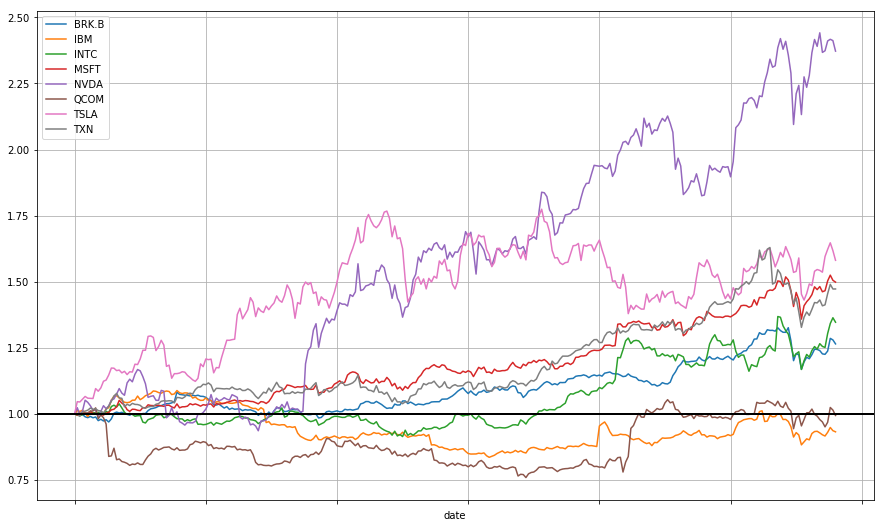

In [5]:
# Popular
microsoft = web.DataReader('MSFT', 'iex', start, end)
ibm = web.DataReader('IBM', 'iex', start, end)
intel = web.DataReader('INTC', 'iex', start, end)
nvidia = web.DataReader('NVDA', 'iex', start, end)
tesla = web.DataReader('TSLA', 'iex', start, end)
berkshire = web.DataReader('BRK.B', 'iex', start, end)
ti = web.DataReader('TXN', 'iex', start, end)
qualcomm = web.DataReader('QCOM', 'iex', start, end)

popular_stocks = pd.DataFrame({"MSFT": microsoft["close"],
                       "IBM": ibm["close"],
                       "INTC": intel["close"],
                       "NVDA": nvidia["close"],
                       "TSLA": tesla["close"],
                       "BRK.B": berkshire["close"],
                       "TXN": ti["close"],
                       "QCOM": qualcomm["close"]})

popular_stock_return = popular_stocks.apply(lambda x: x / x[0])
print(popular_stock_return.head())

popular_stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)